# Regression Problem - Predicting the Apparent Temperature

our dummy model - ?

tommorow:

## 3.random search, going over the models again

1.visualization , understanding and improving, writing better documentation after.

## 2.metrics - choosing mae/r2 , better understanding of the meaning
check out AUC!

4. catagorial features

## 5. feature selection, new features 

6. summing up and trying to explain to myself about the project



*** probability questions!
*** in friday and saturday explaining to someone else!

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

#for preprocessing part
from scipy import stats

In [3]:
# read the dataset 
weather =pd.read_csv("weatherHistory[1].csv")

In [4]:
weather

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [5]:
weather 

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [6]:
#change misprint
weather=weather.rename(columns={'Loud Cover': 'Cloud Cover'})

# 1. getting to know the data

In [7]:
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### What are the features?
*Formatted Date - includes day, week , month, year

*Summary - sum up of the weather in words

*Precip Type - which type of raindrops there are

*Temperature (C) - temp in celcius

*Humidity - Humidity depends on the temperature and pressure .

*Wind Speed (km/h)	

*Wind Bearing (degrees)	- direction of the wind in degrees. For example , a wind blowing from the north has a wind direction referred to as 0° (360°); a wind blowing from the east has a wind direction referred to as 90°, etc.
<!-- The term "wind direction" is defined as the compass heading FROM which the wind is blowing -->

*Visibility (km) - visibility is a measure of the distance at which an object or light can be clearly discerned.	

*Cloud Cover	(loud cover- misprint)

*Pressure (millibars) - High pressure means the air is heavy . Under high pressure you can generally expect sunny skies and calm weather , whereas Low pressure systems lead to active weather like wind and rain, and also severe weather.

*Daily Summary - daily sum up of the weather in words


## What is the target variable?

Apparent Temperature : in simple words, Apparent Temperature is the temperature humans percieve, mostly outdoors, as a combination or the actual air temperature, humidity and wind. 

What else do we know?


*we are starting with 12 variables (including the dependent)



<!-- is The perceived temperature in degrees Fahrenheit derived from either a combination of temperature and wind (Wind Chill) or temperature and humidity (Heat Index) for the indicated hour. -
->




<!-- 1. Because the response variable is continuous, this is a regression problem.
2.There are 96453 observations (represented by the rows), and each observation is a weather report from a different date.
 -->

### the numeric variables histogramas:

here we can see the distribution of the numeric features, and approximately understand the most frequent values of each feature 

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Apparent Temperature (C)'}>,
        <AxesSubplot:title={'center':'Wind Speed (km/h)'}>],
       [<AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>],
       [<AxesSubplot:title={'center':'Cloud Cover'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

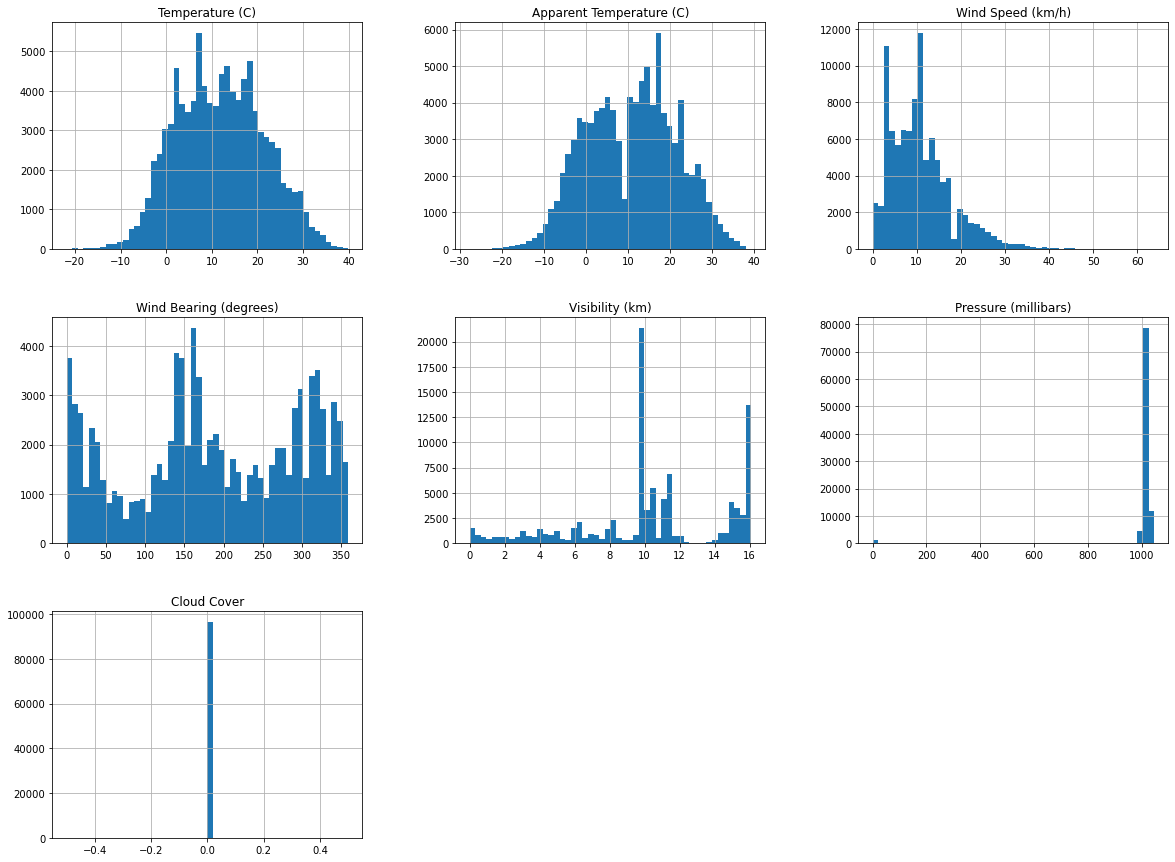

In [8]:
atttibutes_hist = weather[["Temperature (C)", "Apparent Temperature (C)", "Wind Speed (km/h)","Wind Bearing (degrees)",'Visibility (km)', "Pressure (millibars)",'Cloud Cover']].hist(bins=50, figsize=(20,15))
atttibutes_hist

as we can see, cloud cover has only values of 0 , so we should delete it 

In [9]:
del weather['Cloud Cover']

# 2. preprocessing of the data

In [10]:
weather=weather.dropna()

In [11]:
weather.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

as we can see, there is still nan values in the Precip Type column, but the percentage of it is low.

we will handle this by fill in the most common catagory of this feature (rain) instead of the nan values 

In [12]:
print(weather['Precip Type'].value_counts())

rain    85224
snow    10712
Name: Precip Type, dtype: int64


In [13]:
pd.options.mode.chained_assignment = None  # default='warn'
weather['Precip Type'] = weather['Precip Type'].fillna("rain")


#### Precip Type, Temperature, wind speed , Wind Bearing, pressure are features that supposed to be  linked very strongly with the Apparent Temperature (according to the information we read), they are crucial for the prediction of the Apparent Temperature. 

on the other hand, daily summary is not that beneficial,  since we have the column Precip Type and also Summary.



Since Formatted Date is a unique value and Daily Summary is not a numerical value and it has so many different values we can drop them both.

In [14]:
weather

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


In [15]:
weather = weather.drop(columns=['Daily Summary','Formatted Date'])

In [16]:
weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


# getting rid of outliers and checking  for  anomalies:


<AxesSubplot:>

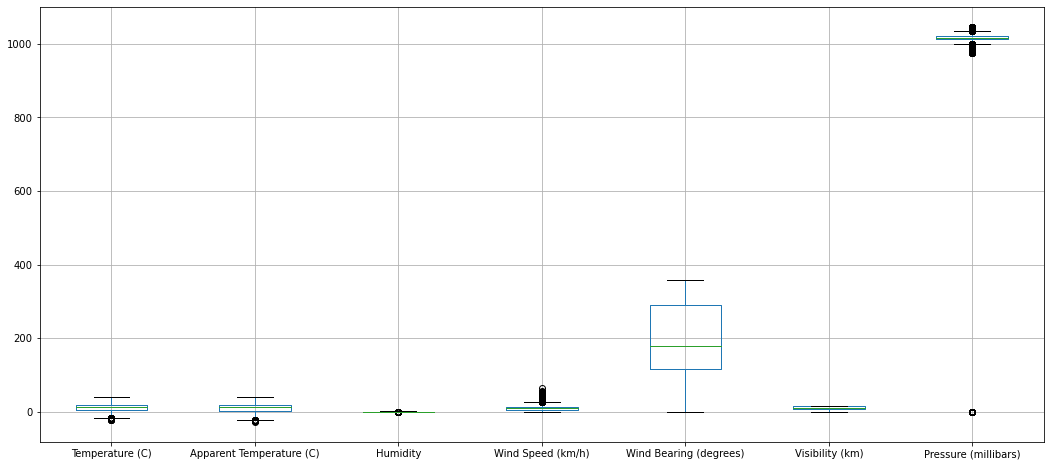

In [17]:
weather.boxplot(figsize=(18,8))

In [18]:
weather[weather['Pressure (millibars)'] == 0].shape[0]

1288

<ipython-input-19-ad536d9daaf5>:2: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.2)
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

Previous Shape With Outlier:  (95936, 9)
1011.89 1021.05
9.159999999999968
998.1500000000001 1034.79
Shape After Removing Outliers: (95936, 9)


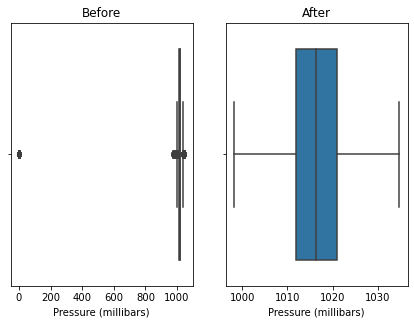

In [19]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",weather.shape)
sns.boxplot(weather['Pressure (millibars)'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
Q1 = weather["Pressure (millibars)"].quantile(0.25)
Q3 = weather["Pressure (millibars)"].quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)
X2 = weather
X2['Pressure (millibars)'] = np.where(X2['Pressure (millibars)']>upper_limit,upper_limit,X2['Pressure (millibars)'])
X2['Pressure (millibars)'] = np.where(X2['Pressure (millibars)'] <lower_limit,lower_limit,X2['Pressure (millibars)'])
print("Shape After Removing Outliers:", X2.shape)
sns.boxplot(X2['Pressure (millibars)'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

In [20]:
weather[weather['Humidity'] == 0].shape[0]

22

Then we need to check outliers or anomalies in Humidity by plotting the box plot.

<AxesSubplot:>

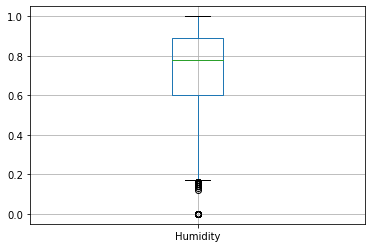

In [21]:
humidity_df = pd.DataFrame(X2["Humidity"])
humidity_df.boxplot()

We can see there is 0.0 humidity. So we should check how many data values are 0.0.

In [22]:
X2[X2['Humidity'] == 0].shape[0]


22

Given Earth’s climate and weather conditions, it’s impossible for humidity to be zero. And the number of data points with this anomaly is also very less so we can simply drop them.

In [23]:
X2 = X2.drop(X2[X2['Humidity'] == 0].index)


# dealing with skews in data
a skew is when the values of a feature tend to be one side, which makes the data unbalanced.  

In [24]:
#weather_copy=weather

In [25]:
#Finding out the skew for each attribute
skew=weather.skew()
print(skew)

Temperature (C)             0.091797
Apparent Temperature (C)   -0.059040
Humidity                   -0.715026
Wind Speed (km/h)           1.115995
Wind Bearing (degrees)     -0.154793
Visibility (km)            -0.492114
Pressure (millibars)        0.012571
dtype: float64


We can see that Humidity is left-skewed and Wind Speed is right-skewed. Visibility also shows some left-skewness but after applying transformations, it did not show a normal distribution. So we did not apply transformations for Visibility.
For right-skewed data, we apply logarithmic transformations and for left-skewed data, we can apply exponential transformations.

Here we have used np.log1p since Wind Speed has 0.0 values, and np.log is only for positive numbers.

In [26]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import linear_model
from sklearn.preprocessing import FunctionTransformer

Histogram for Wind Speed after applying logarithm transformations


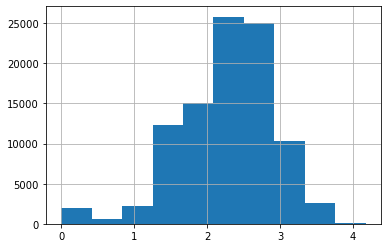

In [27]:
logarithm_transformer = FunctionTransformer(np.log1p)
data_new1 = logarithm_transformer.transform(weather['Wind Speed (km/h)'])
weather['Wind Speed (km/h)']=data_new1
weather['Wind Speed (km/h)'].hist()
print("Histogram for Wind Speed after applying logarithm transformations")

Histogram for Humidity after applying exponential transformations


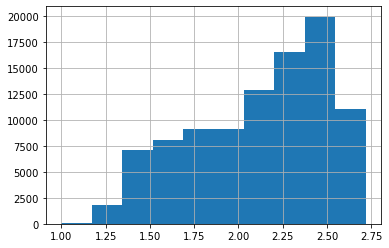

In [28]:
exp_transformer = FunctionTransformer(np.exp)
data_new2 = exp_transformer.transform(weather['Humidity'])
weather['Humidity']=data_new2
weather['Humidity'].hist()
print("Histogram for Humidity after applying exponential transformations")

we will remove the skew of the most unbalanced features

In [29]:
#Finding out the skew for each attribute
skew=weather.skew()
print(skew)

Temperature (C)             0.091797
Apparent Temperature (C)   -0.059040
Humidity                   -0.428884
Wind Speed (km/h)          -0.799401
Wind Bearing (degrees)     -0.154793
Visibility (km)            -0.492114
Pressure (millibars)        0.012571
dtype: float64


array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Apparent Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>],
       [<AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

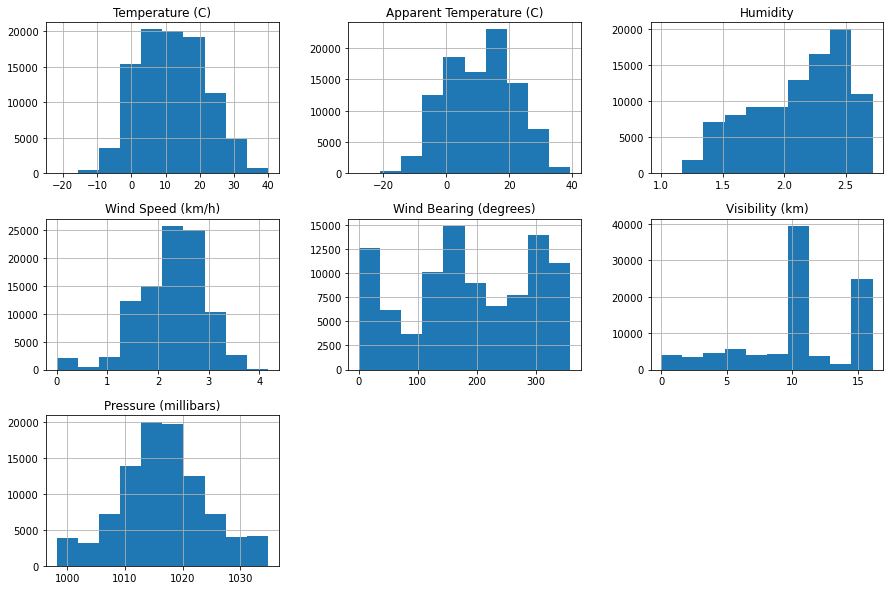

In [30]:
weather.hist(figsize=(15,10))

# checking the relations between humidity and pressure, according to information we've read

As humidity increases pressure decreases

There is a Linear Relation between “Apparent Temperature ” and “Humidity” with a negative slope. As air temperature increases, air can hold more water molecules, and its relative humidity decreases. When temperatures drop, relative humidity increases.

In [ ]:
# sns.pairplot(weather, kind='scatter')

In [ ]:
#weather.boxplot(figsize=(18,8))

In [ ]:
#weather['wind-visibility-ratio']=weather['Wind Speed (km/h)']/weather['Visibility (km)']

In [ ]:
# atttibutes_hist = weather[["Temperature (C)","month",'Humidity']].hist(bins=50, figsize=(20,15))
# atttibutes_hist

In [ ]:
#sns.pairplot(weather, x_vars=['month'], y_vars='Apparent Temperature (C)', height=7, aspect=0.7, kind='reg')

conclusion: when humidity is low, pressure is high

In [ ]:
# <!-- #### as we can see above, the Apparent Temperature  is higher in the months that are in the middle of the year.

# ####  so, we can create a feature that checks if the month is in the middle of the year , or the beggining or the end - we will set the beggining of the middle to be the 5th month, and the end of the middle to be the 9th month

# #### this feature will be called: "middle of year" and will have yes/no values.

# #### this is a good idea to replace this feature with the "month" feature , since it's giving us a more intuitive relation with the Apparent Temperature, and it probably has a  stronger correlation to it. -->

In [ ]:
#weather['middle of year']=(weather['month']>5) & (weather['month']<9)

In [ ]:
#sns.pairplot(weather, x_vars=['middle of year'], y_vars='Apparent Temperature (C)', height=7, aspect=0.7, kind='reg')

as we can see in the correlation below:

In [31]:
corr_matrix = weather.corr()
corr_matrix['Apparent Temperature (C)'].sort_values(ascending=False)

Apparent Temperature (C)    1.000000
Temperature (C)             0.992637
Visibility (km)             0.382589
Wind Bearing (degrees)      0.028951
Wind Speed (km/h)          -0.038266
Pressure (millibars)       -0.273892
Humidity                   -0.594489
Name: Apparent Temperature (C), dtype: float64

## 1.2 encoding catagorial data


One-Hot encoding:

The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly.

There are many libraries out there that support one-hot encoding but the simplest one is using pandas' .get_dummies() method.

For linear models, One-hot Encoding is more suitable. If we apply Lable Encoding for such a situation, then the model will try to identify an order since the feature values are like 0,1,2,3, etc. But if it is a binary category we can use Label Encoding.

we need to encode Summary and Precip Type  to numeric columns

In [32]:
# i will save the original dataFrame for a later use, for example , for the data visualization.
weather_copy=weather.copy()

In [33]:
weather_copy

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,2.435130,2.715999,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,2.363161,2.725536,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,2.435130,1.595014,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,2.293319,2.714933,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,2.293319,2.488616,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,1.537258,2.484598,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,24.583333,1.616074,2.406468,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,22.038889,1.750673,2.300964,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,21.522222,1.822119,2.444900,20.0,16.1000,1015.95


In [34]:
weather['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [35]:
# or 
print(weather['Precip Type'].value_counts())

rain    85224
snow    10712
Name: Precip Type, dtype: int64


converting Precip Type to a category dtype:

In [36]:
weather['Precip Type']=weather['Precip Type'].astype('category')
weather['Precip Type']=weather['Precip Type'].cat.codes

So we need to do One-hot Encoding for the Summary column. pd.get_dummies will make new feature columns according to each category and then we need to merge new feature columns and drop the Summary column as shown in the below code.

In [37]:
dummies_summary = pd.get_dummies(weather['Summary'])
merged_summary = pd.concat([weather,dummies_summary],axis='columns')
weather = merged_summary.drop(['Summary'], axis='columns')
weather

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Breezy,Breezy and Dry,...,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy,Windy and Dry,Windy and Foggy,Windy and Mostly Cloudy,Windy and Overcast,Windy and Partly Cloudy
0,0,9.472222,7.388889,2.435130,2.715999,251.0,15.8263,1015.13,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,9.355556,7.227778,2.363161,2.725536,259.0,15.8263,1015.63,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,9.377778,9.377778,2.435130,1.595014,204.0,14.9569,1015.94,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,8.288889,5.944444,2.293319,2.714933,269.0,15.8263,1016.41,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,8.755556,6.977778,2.293319,2.488616,259.0,15.8263,1016.51,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,0,26.016667,26.016667,1.537258,2.484598,31.0,16.1000,1014.36,0,0,...,0,0,1,0,0,0,0,0,0,0
96449,0,24.583333,24.583333,1.616074,2.406468,20.0,15.5526,1015.16,0,0,...,0,0,1,0,0,0,0,0,0,0
96450,0,22.038889,22.038889,1.750673,2.300964,30.0,16.1000,1015.66,0,0,...,0,0,1,0,0,0,0,0,0,0
96451,0,21.522222,21.522222,1.822119,2.444900,20.0,16.1000,1015.95,0,0,...,0,0,1,0,0,0,0,0,0,0


<!-- If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1. and because the 'Precip Type' column has only 2 catagoreis: -->

In [38]:
# precip_types = {'rain':0,'snow':1}
# weather['precip_type']= weather['Precip Type'].map(precip_types)

In [39]:
weather['Precip Type']

0        0
1        0
2        0
3        0
4        0
        ..
96448    0
96449    0
96450    0
96451    0
96452    0
Name: Precip Type, Length: 95936, dtype: int8

In [40]:
weather

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Breezy,Breezy and Dry,...,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy,Windy and Dry,Windy and Foggy,Windy and Mostly Cloudy,Windy and Overcast,Windy and Partly Cloudy
0,0,9.472222,7.388889,2.435130,2.715999,251.0,15.8263,1015.13,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,9.355556,7.227778,2.363161,2.725536,259.0,15.8263,1015.63,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,9.377778,9.377778,2.435130,1.595014,204.0,14.9569,1015.94,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,8.288889,5.944444,2.293319,2.714933,269.0,15.8263,1016.41,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,8.755556,6.977778,2.293319,2.488616,259.0,15.8263,1016.51,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,0,26.016667,26.016667,1.537258,2.484598,31.0,16.1000,1014.36,0,0,...,0,0,1,0,0,0,0,0,0,0
96449,0,24.583333,24.583333,1.616074,2.406468,20.0,15.5526,1015.16,0,0,...,0,0,1,0,0,0,0,0,0,0
96450,0,22.038889,22.038889,1.750673,2.300964,30.0,16.1000,1015.66,0,0,...,0,0,1,0,0,0,0,0,0,0
96451,0,21.522222,21.522222,1.822119,2.444900,20.0,16.1000,1015.95,0,0,...,0,0,1,0,0,0,0,0,0,0


<!-- In contrast to the 'precip_type' column , the Summary column has a lot of catagories, so we will use labelEncoder in order to transform the non-numerical labels to numerical labels  
 -->

In [41]:
# from sklearn import preprocessing
# lbl_encoder=preprocessing.LabelEncoder()
# weather['summary'] = lbl_encoder.fit_transform(weather['Summary'])
# weather['summary'].unique()

now, after we encoded these values, we need to handle another problem:
the machine learning model may assume that there is some correlation between these variables, which will produce the wrong output. So to remove this issue, we will use dummy encoding.

For Dummy Encoding, we will use OneHotEncoder class of preprocessing library.

In [ ]:
# #for Country Variable  
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
# label_encoder_x= LabelEncoder()  
# weather['Precip Type']= label_encoder_x.fit_transform(weather['Precip Type'])  
# #Encoding for dummy variables  
# onehot_encoder= OneHotEncoder(categories=weather['Precip Type'])    


# pre= onehot_encoder.fit_transform(pre).toarray()  

In [ ]:
# dummy encoding of categorical features
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder(sparse=False)


In [ ]:
#ohe.fit_transform(weather[['summary']])

In [ ]:
#ohe.categories_

In [ ]:
#ohe.fit_transform(weather[['precip_type']])

In [ ]:
#weather['precip_type']

In [ ]:
#(weather[['precip_type']]==1.).count()

In [ ]:
#weather

## 1.3 doing onehotencoding at the same time on both of the categorial columns


now, we will remove Summary and Precip Type columns, cause we alredy made the numeric version of them(summary,precip_type)

In [ ]:
pd.DataFrame(data={'features': weather.columns})

In [ ]:
# import matplotlib.pyplot as plt
# weather.plot(x='Apparent Temperature (C)', y=["precip_type"])
# plt.show()

In [ ]:
AT_column = weather['Apparent Temperature (C)']

In [ ]:
AT_column.plot(kind="hist")
AxesSubplot='Frequency'

##### this means that the most frequent Apparent Temperature is in the range between 10 to 20 celcius

In [ ]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


In [ ]:
# *temperature ,apparant temperature and humidity features has outliers after the min, but not a lot

# *wind speed and summary - a lot of outliers , varies less and therefore, easier to predict

# *most of  the values of wind bearing and visibility features are in the top 50% - the higher values , in contrast to apparant temperature and humidity.

# *middle of year and precif type doesn't have a median 

# correlations old!

### correlation matrix

In [ ]:
#weather['wind-visibility-ratio']=weather['Wind Speed (km/h)']/weather['Visibility (km)']

In [ ]:
#weather.describe()[['humidity-wind-ratio', 'wind-visibility-ratio','Visibility (km)']]

In [ ]:
weather

In [ ]:
X=

In [ ]:
# plt.figure(figsize=(20,10))
# sns.heatmap(weather.corr(),annot=True);

as we can see from the heatmap above, the correlation between the Apparent Temperature to the pressure is very low

In [ ]:
# del weather['Pressure (millibars)']
# del weather['weekday']
# del weather['day']
# del weather['year']

# numerical  features correlation old!

*we can see clearly that there's a strong correlation between temperature and apparent temperatue, 
* 

In [ ]:
import seaborn as sns; #sns.set_theme(color_codes=True)
ax = sns.regplot(x='Wind Speed (km/h)', y="Apparent Temperature (C)", data=weather)

In [ ]:
# import seaborn as sns
# sns.set_theme(style="whitegrid")
# ax = sns.boxplot(x="Visibility (km)", y="Wind Speed (km/h)", data=weather)

# categorial features correlation old!

we took samples of catagories from the "Summary" feature, in order to see the relations between this feature and the "Precip Type" feature with Wind Speed

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.stripplot(x="Summary", y='Apparent Temperature (C)',hue='Precip Type',order=['Rain','Partly Cloudy','Overcast','Foggy','Breezy'], data=weather_copy , linewidth= 1, size=5)

*here we can see what we think intuitively - the apparent temperature, i.e., the temperature we as humans feel is higher when there's snow comparing to when it rains. 

*We assumed that if there's an overcast, the apparent temperatue is lower, but here we can see that it's not neccesarily the case, so we can't say there's a strong correlation between the overcast catagory in Summary and the apparent temperatue.

*another thing we see here is that when it rains, the apparent temperature can vary from 0 to 40 approximately, which means that it's hard to predict what temperature  we would feel when the precip type is rain. 

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.stripplot(x="Summary", y="Wind Speed (km/h)",hue='Precip Type',order=['Rain','Partly Cloudy','Overcast','Foggy','Breezy','Dry'], data=weather_copy , linewidth= 1, size=5)

In [ ]:
# fig, axes = plt.subplots(2, 2, figsize=(15, 15))
# fig.suptitle('categorial features:')
# ax = sns.swarmplot(x=weather_copy["Summary"])

now let's see the correlation between the features after the few changes we did:

In [ ]:
corr_matrix = weather.corr()
corr_matrix['Apparent Temperature (C)'].sort_values(ascending=False)

# 4. choosing a regression metric -

### We chose Mean abs error and R square as  metrics due to the explanations below and also beacause of the following dummy model results   (mae had a better result than rmse)
### later on we will choose one of them as a metric to our best model for the data, depending on how well it works with each model

##### Mean Squared Error (MSE)

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset

when MSE is used as a loss function (regression metric), a lot of weight is given to larger errors because of the square
The units of the MSE are squared units.

A model that achieves an MSE better than the MSE for the naive model has skill.

In [42]:
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

##### Root Mean Squared Error

the units of the RMSE are the same as the original units of the target value that is being predicted, in contrast to MSE.
this is the advantage comapring to MSE.

In [ ]:
# mean_squared_error(y_true, y_pred, squared=False)

#### Mean abs error

like RMSE, the units of the error score match the units of the target value that is being predicted.

Unlike the RMSE, the changes in MAE are linear and therefore intuitive.

*The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable.

#### R Square

R Squared & Adjusted R Squared are used for explaining how well the independent variables in the linear regression model explains the variability in the dependent variable.

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

in  simple words, R2 is the percentage of variation explaind by the relationship between two variables

# 5. Split the data to train and test

In [43]:
X = weather.drop(['Apparent Temperature (C)'],axis=1)
y = weather['Apparent Temperature (C)']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
#train=X_train

In [ ]:
X_train

In [ ]:
X_test.shape

In [ ]:
y_train

# 6. Scaling


את הנירמול לא נעשה על משתנים קטגרויאליים ושמיים שעשינו עליהם כבר encoding  
,כי אין אפשרות להשוות
ניצור גאטא פריים חדש מנורמל
את הויזואליצזיה של הדאטא נעשה על הדאטא פריים המקורי, הלא מנורמל, כדי שנראה את המידע בצורה ברורה ונראה מה המספרים מייצגים

we will do the scaling only on numerical features i.e not on the categorial . 
 i.e , the features we didn't encoded

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [46]:
X_train.isnull().any()

Precip Type                            False
Temperature (C)                        False
Humidity                               False
Wind Speed (km/h)                      False
Wind Bearing (degrees)                 False
Visibility (km)                        False
Pressure (millibars)                   False
Breezy                                 False
Breezy and Dry                         False
Breezy and Foggy                       False
Breezy and Mostly Cloudy               False
Breezy and Overcast                    False
Breezy and Partly Cloudy               False
Clear                                  False
Dangerously Windy and Partly Cloudy    False
Drizzle                                False
Dry                                    False
Dry and Mostly Cloudy                  False
Dry and Partly Cloudy                  False
Foggy                                  False
Humid and Mostly Cloudy                False
Humid and Overcast                     False
Humid and 

In [47]:
X_train2 = X_train.copy()
X_test2 = X_test.copy()

In [48]:
X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

In [49]:
scaler_standard = StandardScaler()
scaler_MinMax = MinMaxScaler()

In [50]:
numerical_features = ["Temperature (C)","Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Pressure (millibars)"]

In [51]:
# Standardization:
scaler_standard.fit(X_train[numerical_features])
X_train_standardized[numerical_features] = scaler_standard.transform(X_train_standardized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
#only transform on the test data
X_test_standardized[numerical_features] = scaler_standard.transform(X_test_standardized[numerical_features])

# Normalization:
scaler_MinMax.fit(X_train[numerical_features])
X_train_normalized[numerical_features] = scaler_MinMax.transform(X_train_normalized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
#only transform on the test data
X_test_normalized[numerical_features] = scaler_MinMax.transform(X_test_normalized[numerical_features])

In [52]:
print('note: the mean is 0 and std is 1')
X_train_standardized.describe()[numerical_features].iloc[[1, 2]]

note: the mean is 0 and std is 1


,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
mean,4.621541e-17,1.621199e-15,1.531222e-16,8.322912e-17,-1.141163e-15,-2.443617e-14
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00


In [53]:
print('note: the mean is 0 and std is 1')
X_train_standardized.describe()[numerical_features].iloc[[1, 2]]

note: the mean is 0 and std is 1


,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
mean,4.621541e-17,1.621199e-15,1.531222e-16,8.322912e-17,-1.141163e-15,-2.443617e-14
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00


In [54]:
X_train_standardized

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Breezy,Breezy and Dry,Breezy and Foggy,...,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy,Windy and Dry,Windy and Foggy,Windy and Mostly Cloudy,Windy and Overcast,Windy and Partly Cloudy
49839,0,0.925481,-0.871737,0.982444,1.223295,0.220327,-0.674807,0,0,0,...,1,0,0,0,0,0,0,0,0,0
23605,0,1.568290,-1.669177,1.193141,0.329556,0.000663,-0.769524,0,0,0,...,1,0,0,0,0,0,0,0,0,0
26053,0,0.425389,-0.825422,1.307751,-1.290344,0.220327,0.945768,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3299,1,-1.996750,0.205142,-0.689594,0.217839,-1.282638,2.367826,0,0,0,...,0,0,1,0,0,0,0,0,0,0
90469,0,-0.606123,-0.487918,0.131234,1.577066,0.054615,1.248085,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0,0.267587,0.496632,-0.701421,-0.471084,1.014200,0.215277,0,0,0,...,1,0,0,0,0,0,0,0,0,0
54964,1,-2.488140,0.556700,0.278527,0.134051,-1.621768,-0.586577,0,0,0,...,0,1,0,0,0,0,0,0,0,0
76963,0,-0.542306,0.866215,0.274394,-0.350057,1.068153,-0.472397,0,0,0,...,1,0,0,0,0,0,0,0,0,0
860,0,0.753175,0.378285,-2.565402,-0.620041,-0.087974,-0.532082,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_normalized

In [ ]:
X_train2.isnull().any()

In [ ]:
# y_train

# 7. data visualization

 using the preproccessed dataFrame, before scaling, 
in order to get meaningful and clear picture of the data

 using the preproccessed dataFrame, before scaling, 
in order to get meaningful and clear picture of the data

In [55]:
train=X_train2.copy()

In [56]:
train_numeric=train[numerical_features]

In [57]:
train_numeric['Apparent Temperature (C)']=y_train

# correlations

### correlation matrix

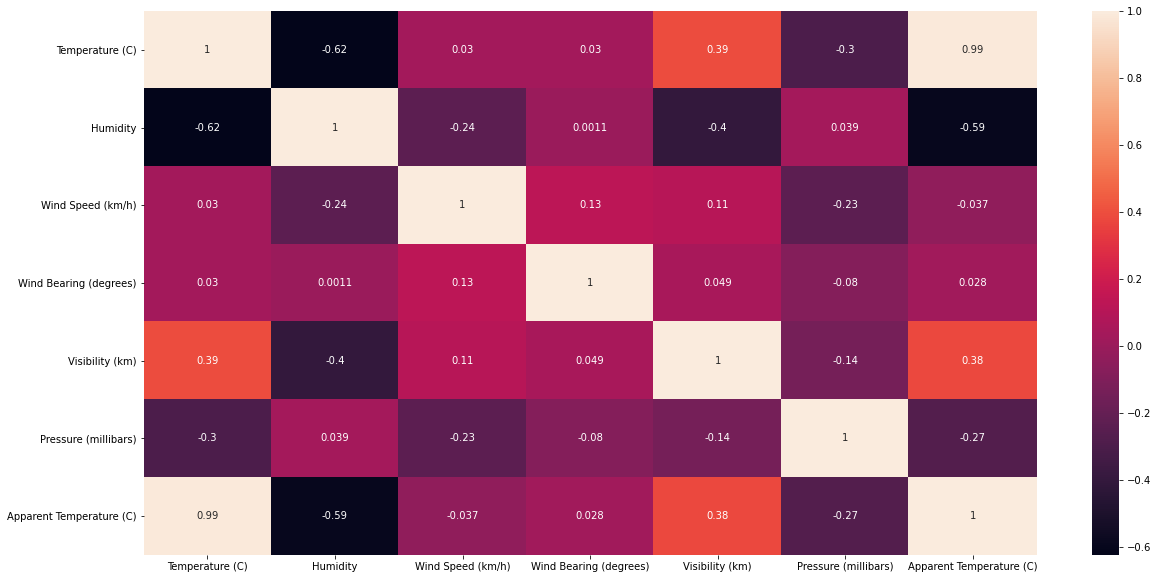

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(train_numeric.corr(),annot=True);

as we can see from the heatmap above, the correlation between the Apparent Temperature to the pressure is very low

Numerical input variables may have a highly skewed or non-standard distribution.

This could be caused by outliers in the data, multi-modal distributions, highly exponential distributions, and more.

In [59]:
#doing fit only on the train, transform on both
X2=X_train.copy()
Y2=X_test.copy()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

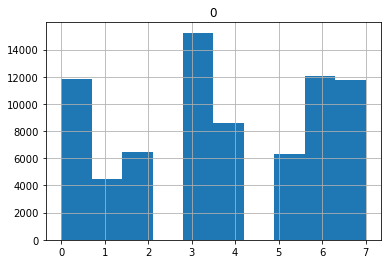

In [60]:

data1 = pd.DataFrame(X2, columns=['Wind Bearing (degrees)'])
data1 = data1.dropna()
data2 = pd.DataFrame(Y2, columns=['Wind Bearing (degrees)'])
data2 = data2.dropna()
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform')
discretizer.fit(data1)
_discretize1 = discretizer.transform(data1)
_discretize2 = discretizer.transform(data2)
X_dis = pd.DataFrame(_discretize1)
Y_dis = pd.DataFrame(_discretize2)
X_dis.hist()

checking out which features have the highest correlation with the target variable - Apparent Temperature


In [61]:
corr_matrix = train_numeric.corr()
corralations = corr_matrix['Apparent Temperature (C)'].sort_values(ascending = False) 
high_corr = (corralations > 0.2)|(corralations < -0.2)
pd.DataFrame(corralations[high_corr])
corralations[high_corr].index

Index(['Apparent Temperature (C)', 'Temperature (C)', 'Visibility (km)',
       'Pressure (millibars)', 'Humidity'],
      dtype='object')

heatmap of the high correlations with  Apparent Temperature:


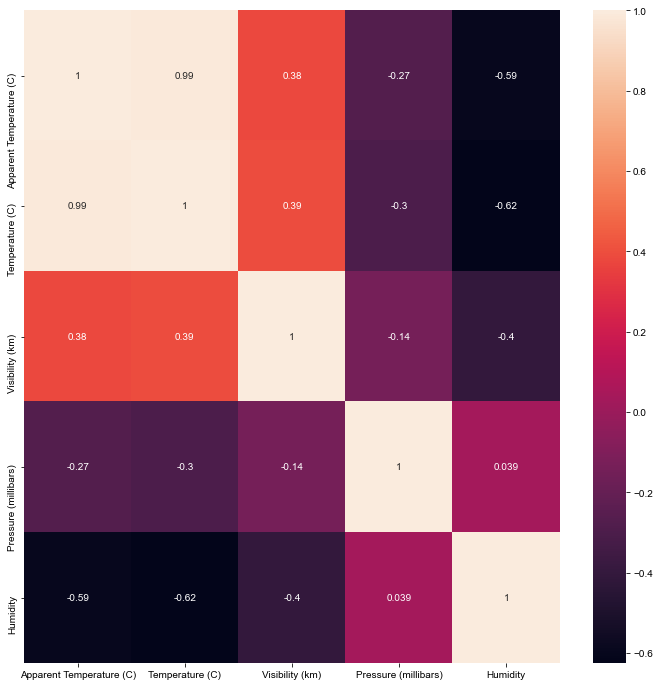

In [62]:
# cmap = sns.diverging_palette(30, 230, 90, 20, as_cmap=True)
print("heatmap of the high correlations with  Apparent Temperature:")
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(train_numeric[corralations[high_corr].index].corr(),annot=True)
sns.set(font_scale=1)

In [63]:
train_numeric

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Apparent Temperature (C)
49839,20.811111,1.786038,2.930778,319.0,11.2700,1011.34,20.811111
23605,26.966667,1.476981,3.070826,223.0,10.3523,1010.61,26.777778
26053,16.022222,1.803988,3.147006,49.0,11.2700,1023.83,16.022222
3299,-7.172222,2.203396,1.819391,211.0,4.9910,1034.79,-9.805556
90469,6.144444,1.934792,2.364987,357.0,10.5777,1026.16,4.116667
...,...,...,...,...,...,...,...
6265,14.511111,2.316367,1.811529,137.0,14.5866,1018.20,14.511111
54964,-11.877778,2.339647,2.462891,202.0,3.5742,1012.02,-17.744444
76963,6.755556,2.459603,2.460144,150.0,14.8120,1012.90,4.633333
860,19.161111,2.270500,0.572560,121.0,9.9820,1012.44,19.161111


In [64]:
# sns.pairplot(weather,hue='Wind Bearing (degrees)', kind='scatter')

In [65]:
X_train2['Wind Bearing (degrees)']

49839    319.0
23605    223.0
26053     49.0
3299     211.0
90469    357.0
         ...  
6265     137.0
54964    202.0
76963    150.0
860      121.0
15795    223.0
Name: Wind Bearing (degrees), Length: 76748, dtype: float64

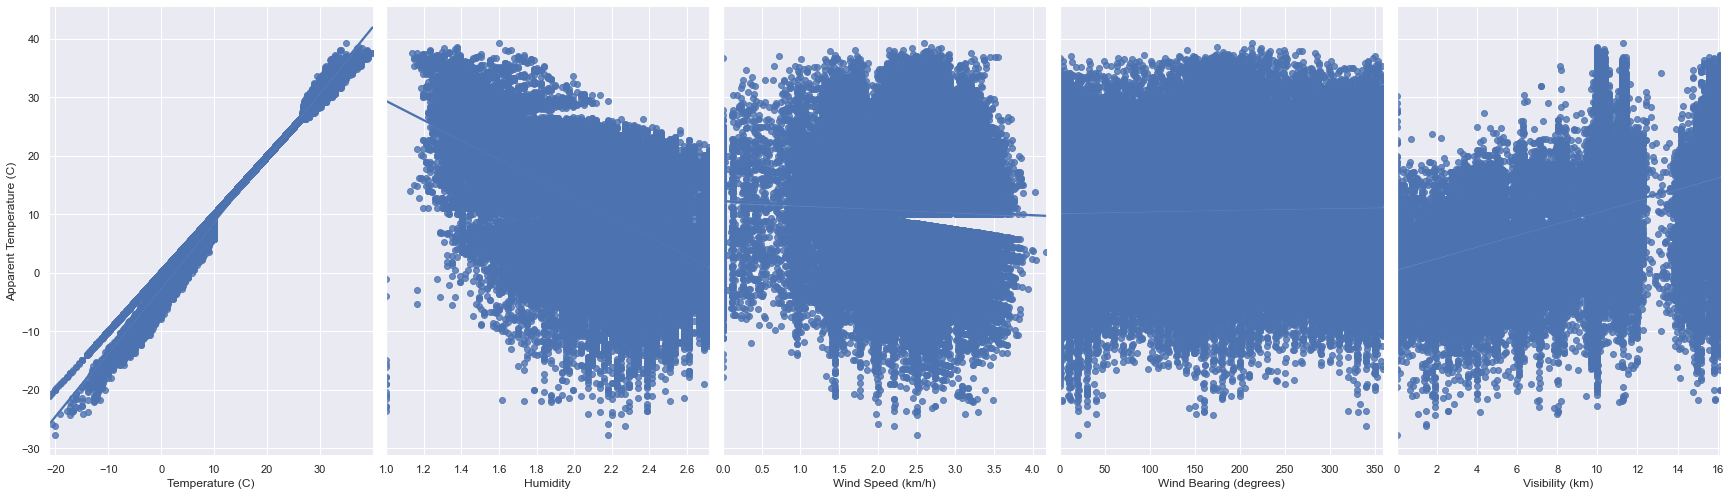

In [66]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(train_numeric, x_vars=['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)'], y_vars='Apparent Temperature (C)', height=7, aspect=0.7, kind='reg')

In [67]:
# sns.scatterplot(data=train_numeric, x='Temperature (C)', y= 'Wind Speed (km/h)')

 we can see that temperature, humidity and visibility are highly correlated to the apparent temperature in comparison to other features

### replacing a feature with a better one - 
we tried to create 2 more features, but they didn't improved our dataset in order to predict the apparent temperature.
the features:
1. middle of year -  checks if the month is in the middle of the year , or the beggining or the end - we have set the beggining of the middle to be the 5th month, and the end of the middle to be the 9th month ( if its in the middle of the year - true, if it isn't - false.
2. weather['wind-visibility-ratio']=weather['Wind Speed (km/h)']/weather['Visibility (km)'] - it gave a higher correlation than wind speed, but it didn't improved anything since we had to get rid of one of the features that we assumed is very beneficial to the prediction


In [ ]:
sns.scatterplot(data=weather, x='Visibility (km)', y="Wind Speed (km/h)")

# categorial features correlation:

In [ ]:
weather_copy

we took samples of catagories from the "Summary" feature, in order to see the relations between this feature and the "Precip Type" feature with the target

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.stripplot(x="Summary", y='Apparent Temperature (C)',hue='Precip Type',order=['Rain','Partly Cloudy','Overcast','Foggy','Breezy'], data=weather_copy , linewidth= 1, size=5)

*here we can see what we think intuitively - the apparent temperature, i.e., the temperature we as humans feel is higher when there's snow comparing to when it rains. 

*We assumed that if there's an overcast, the apparent temperatue is lower, but here we can see that it's not neccesarily the case, so we can't say there's a strong correlation between the overcast catagory in Summary and the apparent temperatue.

*another thing we see here is that when it rains, the apparent temperature can vary from 0 to 40 approximately, which means that it's hard to predict what temperature  we would feel when the precip type is rain. 

In [ ]:
# import matplotlib.pyplot as plt
# weather.plot(x='Apparent Temperature (C)', y=["precip_type"])
# plt.show()

In [ ]:
# AT_column = train['Apparent Temperature (C)']

In [ ]:
# AT_column.plot(kind="hist")
# AxesSubplot='Frequency'

##### this means that the most frequent Apparent Temperature is in the range between 10 to 20 celcius

# numerical  features correlation:

In [ ]:
# fig , axs = plt.subplots(ncols=7,nrows=2, figsize=(20,10))
# index=0
# axs= axs.flatten()
# for k ,v in weather.items():
#     sns.boxplot(y=k, data=weather , ax=axs[index])
#     index +=1
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# *temperature ,apparant temperature and humidity features has outliers after the min, but not a lot

# *wind speed - a lot of outliers , varies less and therefore, easier to predict

# *most of  the values of wind bearing and visibility features are in the top 50% - the higher values , in contrast to apparant temperature and humidity.


In [ ]:
# sns.pairplot(df[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Car_Age']], kind='reg')

In [ ]:
# visualize the relationship between the features and the response using scatterplots
# sns.pairplot(train_numeric, height=7, aspect=0.7, kind='reg')

In [ ]:
import seaborn as sns; #sns.set_theme(color_codes=True)
ax = sns.regplot(x='Wind Speed (km/h)', y="Apparent Temperature (C)", data=weather)

In [ ]:
# import seaborn as sns
# sns.set_theme(style="whitegrid")
# ax = sns.boxplot(x="Visibility (km)", y="Wind Speed (km/h)", data=weather)

In [ ]:
# fig, axes = plt.subplots(2, 2, figsize=(15, 15))
# fig.suptitle('categorial features:')
# ax = sns.swarmplot(x=weather_copy["Summary"])

now let's see the correlation between the features after the few changes we did:

In [ ]:
corr_matrix = weather.corr()
corr_matrix['Apparent Temperature (C)'].sort_values(ascending=False)

In [ ]:
#['Apparent Temperature (C)']=y_train
# sns.heatmap(X_train2.corr(),annot=True);


In [ ]:
X_train.head()
# delete presure , day month weekday ...
#percip type and summary are catagorials

In [ ]:
# scaler_standard = StandardScaler()


In [ ]:
print('note: the mean is 0 and std is 1')
X_train_standardized.describe()[numerical_features].iloc[[1, 2]]

In [ ]:
X_train_scale=X_train.copy()
y_train_scale=y_train.copy()

deleting the encoded variables (categorials)

*on the train set -fit and transform 

*on the test set -transform only 

## old version of scALING

In [ ]:
X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()
# X_train_normalized = X_train.copy()
# X_test_normalized = X_test.copy()

In [ ]:
numerical_features = ["Temperature (C)","Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Pressure (millibars)"]

In [ ]:
# # Standardization:
# scaler_standard.fit(X_train[numerical_features])
# X_train_standardized[numerical_features] = scaler_standard.transform(X_train_standardized[numerical_features])

# # the scaling is with the the same fitted scaler (by the train data)
# #only transform on the test data
# X_test_standardized[numerical_features] = scaler_standard.transform(X_test_standardized[numerical_features])

In [ ]:
print('note: the mean is 0 and std is 1')
X_train_standardized.describe()[numerical_features].iloc[[1, 2]]

*** in this part we do not touch the test set!
 
 
 we will only use the test set for the dummy model , and after the cross validation

the data is imbalanced as we can see from the histogram below

## dummy model

In [68]:
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_absolute_error as MAE

from matplotlib import pyplot
from sklearn.metrics import mean_squared_error



In [69]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
R2_score = dummy_regr.score(X_test, y_test)
y_predict = dummy_regr.predict(X_test)
mae = MAE(y_test, y_predict)
rmse= mean_squared_error(y_test, y_predict, squared=False)


print ('The dummy model have a root mean squared error of '+ str(rmse) )

# errorsRMSE

The dummy model have a root mean squared error of 10.71242142413828


In [70]:
print('The dummy model have a R2 score of ' + str(R2_score)[:6] + " as expected (around 0), and mean absolute error of " + str(mae)[:4])

The dummy model have a R2 score of -2.208 as expected (around 0), and mean absolute error of 9.01


# The dummy model have a R2 score of -7.151 as expected (around 0), and mean absolute error of 9.02

# comparing different Regression Models

*cross validation allows us to compare different machine learning methods and get a sense of how well they will work in practice. the advantage here, is that it uses different blocks of data for train and test, and by that, "prepare" the model in the best way to predict outcome for new data  

 # Linear Regression

In [74]:
X_train.isnull().any()

Precip Type                            False
Temperature (C)                        False
Humidity                               False
Wind Speed (km/h)                      False
Wind Bearing (degrees)                 False
Visibility (km)                        False
Pressure (millibars)                   False
Breezy                                 False
Breezy and Dry                         False
Breezy and Foggy                       False
Breezy and Mostly Cloudy               False
Breezy and Overcast                    False
Breezy and Partly Cloudy               False
Clear                                  False
Dangerously Windy and Partly Cloudy    False
Drizzle                                False
Dry                                    False
Dry and Mostly Cloudy                  False
Dry and Partly Cloudy                  False
Foggy                                  False
Humid and Mostly Cloudy                False
Humid and Overcast                     False
Humid and 

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [76]:
LR = LinearRegression()

In [77]:
y_train

49839    20.811111
23605    26.777778
26053    16.022222
3299     -9.805556
90469     4.116667
           ...    
6265     14.511111
54964   -17.744444
76963     4.633333
860      19.161111
15795     2.500000
Name: Apparent Temperature (C), Length: 76748, dtype: float64

In [78]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(LR, X_train_standardized, y_train, cv=kf)
y_predict_standardized = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)

R2_scores_normalized = cross_val_score(LR, X_train_normalized, y_train, cv=kf)
y_predict_normalized = cross_val_predict(LR, X_train_normalized, y_train, cv=kf)
mae_normalized = MAE(y_train, y_predict_normalized)

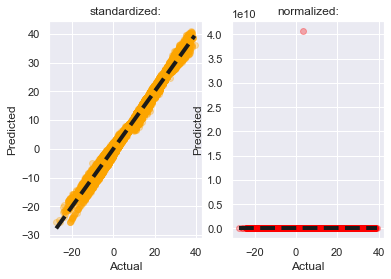

In [79]:
fig, axes = plt.subplots(1,2)
((ax1, ax2)) = axes

y_predicted = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
ax1.scatter(y_train, y_predicted, alpha=0.3, color='orange')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('standardized:')

y_predicted = cross_val_predict(LR, X_train_normalized, y_train, cv=kf)
ax2.scatter(y_train, y_predicted, alpha=0.3, color='red')
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('normalized:')

plt.show()


In [ ]:
#standadized train set cross validation:

In [80]:
print("the scores of cross validation are:")
print(R2_scores_standardized)
print()
print("mean R2 is: " + str(R2_scores_standardized.mean())[:5] + " with std of  " + str(R2_scores_standardized.std())[:5] + " and MAE of " + str(mae_standarsized)[:6])

the scores of cross validation are:
[0.99047373 0.99018814 0.99014182 0.99034582 0.99037989 0.99029444
 0.99031879 0.99026783 0.99029438 0.99029465]

mean R2 is: 0.990 with std of  8.813 and MAE of 0.8347


In [81]:
#normalized train set cross validation:

In [82]:
print("the scores of cross validation are:")
print(R2_scores_normalized)
print()
print("mean R2 is: " + str(R2_scores_normalized.mean())[:5] + " with std of  " + str(R2_scores_normalized.std())[:5] + " and MAE of " + str(mae_normalized)[:6])

the scores of cross validation are:
[ 9.90473771e-01  9.90188127e-01  9.90141822e-01  9.90345825e-01
  9.90379888e-01  9.90294438e-01  9.90318786e-01  9.90267830e-01
  9.90294338e-01 -1.85485819e+15]

mean R2 is: -1854 with std of  55645 and MAE of 531062


although the results are the same with normalized and standardized,
we can see below that the feature values are definetly different 

In [83]:
X_train_normalized

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Breezy,Breezy and Dry,Breezy and Foggy,...,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy,Windy and Dry,Windy and Foggy,Windy and Mostly Cloudy,Windy and Overcast,Windy and Partly Cloudy
49839,0,0.687062,0.457456,0.702468,0.888579,0.700,0.359989,0,0,0,...,1,0,0,0,0,0,0,0,0,0
23605,0,0.787945,0.277592,0.736035,0.621170,0.643,0.340066,0,0,0,...,1,0,0,0,0,0,0,0,0,0
26053,0,0.608577,0.467903,0.754295,0.136490,0.700,0.700873,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3299,1,0.228444,0.700349,0.436083,0.587744,0.310,1.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,0
90469,0,0.446690,0.544027,0.566855,0.994429,0.657,0.764465,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0,0.583811,0.766095,0.434199,0.381616,0.906,0.547216,0,0,0,...,1,0,0,0,0,0,0,0,0,0
54964,1,0.151325,0.779643,0.590322,0.562674,0.222,0.378548,0,0,0,...,0,1,0,0,0,0,0,0,0,0
76963,0,0.456706,0.849455,0.589663,0.417827,0.920,0.402566,0,0,0,...,1,0,0,0,0,0,0,0,0,0
860,0,0.660020,0.739401,0.137235,0.337047,0.620,0.390011,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [84]:
X_train_standardized

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Breezy,Breezy and Dry,Breezy and Foggy,...,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy,Windy and Dry,Windy and Foggy,Windy and Mostly Cloudy,Windy and Overcast,Windy and Partly Cloudy
49839,0,0.925481,-0.871737,0.982444,1.223295,0.220327,-0.674807,0,0,0,...,1,0,0,0,0,0,0,0,0,0
23605,0,1.568290,-1.669177,1.193141,0.329556,0.000663,-0.769524,0,0,0,...,1,0,0,0,0,0,0,0,0,0
26053,0,0.425389,-0.825422,1.307751,-1.290344,0.220327,0.945768,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3299,1,-1.996750,0.205142,-0.689594,0.217839,-1.282638,2.367826,0,0,0,...,0,0,1,0,0,0,0,0,0,0
90469,0,-0.606123,-0.487918,0.131234,1.577066,0.054615,1.248085,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0,0.267587,0.496632,-0.701421,-0.471084,1.014200,0.215277,0,0,0,...,1,0,0,0,0,0,0,0,0,0
54964,1,-2.488140,0.556700,0.278527,0.134051,-1.621768,-0.586577,0,0,0,...,0,1,0,0,0,0,0,0,0,0
76963,0,-0.542306,0.866215,0.274394,-0.350057,1.068153,-0.472397,0,0,0,...,1,0,0,0,0,0,0,0,0,0
860,0,0.753175,0.378285,-2.565402,-0.620041,-0.087974,-0.532082,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Random Forest Regressor

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [86]:
#RFR = RandomForestRegressor()

In [87]:
regr = RandomForestRegressor(max_depth=2, random_state=42)
regr.fit(X_train_standardized, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [88]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [89]:
R2_scores_standardized = cross_val_score(regr, X_train_standardized, y_train, cv=kf)
y_predict_standardized = cross_val_predict(regr, X_train_standardized, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)

In [90]:
# R2_scores_normalized = cross_val_score(regr, X_train_normalized, y_train, cv=kf)
# y_predict_normalized = cross_val_predict(regr, X_train_normalized, y_train, cv=kf)
# mae_normalized = MAE(y_train, y_predict_normalized)

In [91]:
print("the scores of cross validation are:")
print(R2_scores_standardized)
print()
print("mean R2 is: " + str(R2_scores_standardized.mean())[:5] + " with std of  " + str(R2_scores_standardized.std())[:5] + " and MAE of " + str(mae_standarsized)[:6])

the scores of cross validation are:
[0.90955918 0.90891527 0.90512238 0.90632496 0.90769555 0.90906687
 0.90480143 0.90576264 0.90657192 0.90752096]

mean R2 is: 0.907 with std of  0.001 and MAE of 2.6521


In [92]:
# print("the scores of cross validation are:")
# print(R2_scores_normalized)
# print()
# print("mean R2 is: " + str(R2_scores_normalized.mean())[:5] + " with std of  " + str(R2_scores_normalized.std())[:5] + " and MAE of " + str(mae_normalized)[:6])

the results are not so good with the MAE metric. we will try to decrese the MAE and increase the R2 with random search - choosing the best hyperparameter for the random forest model.

In [93]:
FEATURE IMPORTANCE

SyntaxError: invalid syntax (<ipython-input-93-dca66189d0bb>, line 1)

 for regression trees its variance. So when training a tree we can compute how much each feature contributes to decreasing the weighted impurity. feature_importances_ in Scikit-Learn is based on that logic, but in the case of Random Forest, we are talking about averaging the decrease in impurity over trees.

In [ ]:
# feature_imp = pd.Series(regr.feature_importances_, index = X.columns).sort_values(ascending=False)
# # multiplying by a hundred to see importance in percentage
# feature_imp 

# random search random forest

# hyperparameter tuning 
I will try to increase the R2 score and the MAE of the Random Forest Regressor model by choosing the best hyperparams.

## random search 

With small data sets and lots of resources, Grid Search will produce accurate results. However, with large data sets, the high dimensions will greatly slow down computation time and be very costly. Therefore, we chose to use random search for 

random search requires two arguments. The first is the model that you are optimizing. This is an instance of the model with values of hyperparameters set that you want to optimize. 
The second is the search space:
This is defined as a dictionary where the names are the hyperparameter arguments to the model and the values are discrete values or a distribution of values to sample in the case of a random search.

In [96]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from rfpimp import permutation_importances
from sklearn.metrics import r2_score


In [97]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [120]:
# Number of trees in random forest
# to get better resluts and hyperparameters , i increased the number of estimators.
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]

# Number of features to consider at every split
#If “auto”, then max_features=n_features.
max_features = ['auto']

# Maximum number of levels in tree
# to get better resluts and hyperparameters , i made the depth wider.
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'max_features': ['auto'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [121]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

# rf = regr
# RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use 4 cores - according to my cpu
# Setting refit='r2', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated r2 score.

rf_random = RandomizedSearchCV(estimator = regr, param_distributions = random_grid, n_iter = 10, cv = kf,  scoring=['neg_mean_absolute_error','r2'] , refit='r2', verbose=2, random_state=42, n_jobs = 4)

# Fit the random search model
rf_random.fit(X_train_standardized, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(max_depth=2,
                                                   random_state=42),
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 64, 118, 173, 227,
                                                         282, 336, 391, 445,
                                                         500]},
                   random_state=42, refit='r2',
   

ממה שעידן עשה:

In [103]:
# rf.fit(X_train_standardized, y_train)
rf = rf_random.best_estimator_
rf.fit(X_train_standardized, y_train)

RandomForestRegressor(max_depth=60, min_samples_split=5, n_estimators=136,
                      random_state=42)

In [104]:
rf.feature_importances_
feature_imp = pd.Series(rf.feature_importances_,index=X_train_standardized.columns).sort_values(ascending=False)
print("feature importances list:")
feature_imp

feature importances list:


Temperature (C)                        9.897603e-01
Wind Speed (km/h)                      9.739321e-03
Humidity                               4.850426e-04
Pressure (millibars)                   5.165182e-06
Wind Bearing (degrees)                 4.325148e-06
Visibility (km)                        3.698044e-06
Clear                                  4.331427e-07
Overcast                               4.188603e-07
Partly Cloudy                          4.174137e-07
Mostly Cloudy                          3.716865e-07
Precip Type                            1.643654e-07
Foggy                                  1.570129e-07
Breezy and Overcast                    4.691632e-08
Windy and Overcast                     4.036833e-08
Dry and Partly Cloudy                  2.735011e-08
Windy and Partly Cloudy                2.630041e-08
Breezy and Partly Cloudy               2.005423e-08
Breezy and Mostly Cloudy               1.882684e-08
Dry                                    9.417921e-09
Breezy and F

another option: try it if something goes wrong

In [122]:
 from sklearn.feature_selection import RFECV

In [ ]:
# Feature ranking with recursive feature elimination.

f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()




rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")

rfe.fit(X_train_standardized,y_train) # change to standarrized x!


selected_features = np.array(features)[rfe.get_support()]


In [ ]:
# rf_fit=rf_random.fit(X_train_standardized, y_train)

In [ ]:
#  scoring =Strategy to evaluate the performance of the cross-validated model on the test set.

In [107]:
# Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. 
rf_random.best_estimator_

RandomForestRegressor(max_depth=60, min_samples_split=5, n_estimators=136,
                      random_state=42)

In [105]:
#Mean cross-validated score of the best_estimator.\
# after checking the score of the mae, we saw that the the r2 score was better 
rf_random.best_score_



0.9999656117631153

In [106]:
# Parameter setting that gave the best results on the hold out data.
rf_random.best_params_

{'n_estimators': 136,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

In [ ]:
# rf.fit(X_train_standardized, y_train)

פונקציה שמייצרת גרף למאפיינים ככה שניתן לראות את חשיבות כל מאפיין

In [108]:
# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.set(font_scale = 0.7)
    p=sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)
#     p.set_ylabel("'feature'", fontsize = 5)

In [ ]:
# def r2(rf, X_train, y_train):
#     return r2_score(y_train, rf.predict(X_train))

# perm_imp_rfpimp = permutation_importance(rf, X_train, y_train, scoring='r2')

In [ ]:
# perm_imp_rfpimp.importances_mean

In [ ]:
# perm_imp_rfpimp.feature_importance

In [ ]:
# perm_imp_rfpimp.feature_importance

In [109]:
def r2(rf, X_train_standardized, y_train):
    return r2_score(y_train, rf.predict(X_train_standardized))

perm_imp_rfpimp = permutation_importances(rf, X_train_standardized, y_train, r2)

In [110]:
perm_imp_rfpimp.reset_index(drop = False, inplace = True)

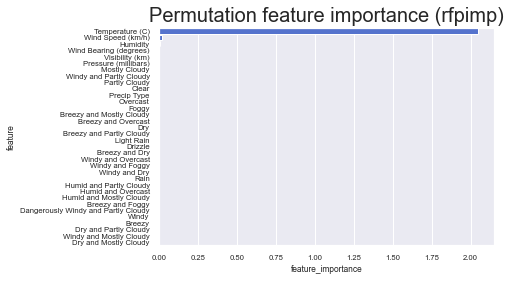

In [111]:
var_imp_plot(perm_imp_rfpimp, 'Permutation feature importance (rfpimp)')

In [112]:
perm_imp_rfpimp.importances_mean

AttributeError: 'DataFrame' object has no attribute 'importances_mean'

In [113]:
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df


## finding the weight of the parametes

In [114]:
import eli5
from eli5.sklearn import PermutationImportance

# i deacresed the number of iterations so it will be easier to run
perm = PermutationImportance(rf, cv = None, refit = False, n_iter = 10).fit(X_train_standardized,y_train)
perm_imp_eli5 = imp_df(X_train_standardized.columns, perm.feature_importances_)


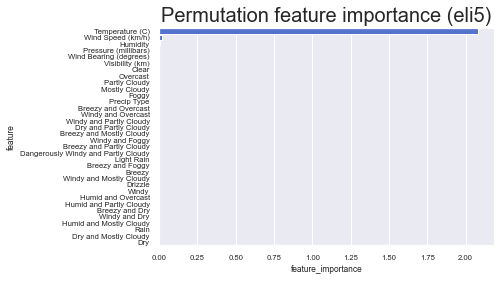

In [115]:
var_imp_plot(perm_imp_eli5, 'Permutation feature importance (eli5)')

features with the highest importance:
    temperature
    wind speed
    foggy
    wind bearing
    overcast
    humidity

features with the lowest importance:
    visibility
    Precip type
    pressure
    

In [ ]:
X_train_standardized

In [116]:
features=pd.DataFrame(data={'features': X_train_standardized.columns})
data={'features': X_train_standardized.columns}

In [117]:
 eli5.show_weights(perm, target_names =data)

Weight,Feature
2.0816 ± 0.0215,x1
0.0215 ± 0.0003,x3
0.0057 ± 0.0001,x2
0.0000 ± 0.0000,x6
0.0000 ± 0.0000,x4
0.0000 ± 0.0000,x5
0.0000 ± 0.0000,x13
0.0000 ± 0.0000,x25
0.0000 ± 0.0000,x26
0.0000 ± 0.0000,x24


In [ ]:
# after finding the best hypermeters:

# Testing best Random forest Regressor model:

In [ ]:
rf = rf_random.best_estimator_
rf.fit(X_train_normalized, y_train)

R2_score = rf.score(X_test_normalized, y_test)
y_predict = rf.predict(X_test_normalized)
mae_score = MAE(y_test, y_predict)

indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='orange')
axs.plot(indexes, y_test, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

pd.DataFrame(index=['test RFR model'], data={'R2_score': R2_score, 'MAE score': mae_score}) 

# Keras Regressions

In [ ]:
Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network architecture.



In [ ]:
X_train


In [ ]:
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
 we will use a fully-connected network structure with three layers.

Fully connected layers are defined using the Dense class. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
# We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.
# Also, ADAM optimization algorithm is used for optimizing loss function (Mean squared error)

In [ ]:
keras.metrics.RootMeanSquaredError()

In [ ]:
We will use the rectified linear unit activation function referred to as ReLU on all the 4 layers.

In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae',tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
y_test

In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test= np.asarray(X_test).astype(np.float32)
y_test= np.asarray(y_test).astype(np.float32)

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)
model.summary()

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

let's check the values of each metric

In [ ]:
model.history.history['val_mse']

In [ ]:
model.history.history['val_mae']

In [ ]:
model.history.history['val_root_mean_squared_error']

see the loss of each metric in a plot

In [ ]:
# plot metrics
pyplot.plot(loss_df ['mse'])


In [ ]:
pyplot.plot(loss_df ['mae'])


In [ ]:
pyplot.plot(loss_df ['root_mean_squared_error'])

In [ ]:

print(loss_df.keys())

In [ ]:
# cv = number of folds
# n_iter - number of iterrations

For Conclusion:

what can we do better?

*use SMOGN or SMOTER to balance the data
*use other feature selection methods such as 